Analisis Data Coffee Shop 

In [2]:
#menginmport library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# MetaData:
 
*  transaction_id : ID berurutan unik yang mewakili transaksi individu 
*  transaction_date : Tanggal transaksi (MM/DD/YY) 
*  transaction_time : Stempel waktu transaksi (HH:MM:SS) 
*  transaction_qty : Jumlah barang yang terjual 
*  store_id : ID unik dari kedai kopi tempat transaksi terjadi 
*  store_location : Lokasi kedai kopi tempat transaksi terjadi 
*  product_id : ID unik dari produk yang dijual 
*  unit_price : Harga eceran dari produk yang dijual 
*  product_category : Deskripsi dari kategori produk 
*  product_type : Deskripsi dari jenis produk
*  product_detail : Deskripsi dari detail produk

In [3]:
#read data Dataset Coffee Shop
data = pd.read_excel("Coffee Shop Sales.xlsx")

In [4]:
#melihat data teratas menggunakan head
data.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [5]:
#mengecek data apakah ada missing value
data.isna().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [6]:
#melihat info dari datanya termasuk data typesnya
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [7]:
#mengecek data duplikat
data.duplicated().any()

False

In [8]:
#melihat unique value dari data
columnValue = data.nunique().reset_index()

#rename column name 
columnValue.rename(columns = {"index" : "Column _name", 0 : "Unique values"}, inplace = 1)

#see columns and number of unique values of each
columnValue

,Column _name,Unique values
0,transaction_id,149116
1,transaction_date,181
2,transaction_time,25762
3,transaction_qty,6
4,store_id,3
5,store_location,3
6,product_id,80
7,unit_price,41
8,product_category,9
9,product_type,29


In [9]:
#melihat info numerical dari data
data.describe()

,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000
std,43153.600016,NaN,0.542509,2.074241,17.930020,2.658723


In [10]:
#melihat info categorical data 
data.describe(include = "object")

,transaction_time,store_location,product_category,product_type,product_detail
count,149116,149116,149116,149116,149116
unique,25762,3,9,29,80
top,09:31:15,Hell's Kitchen,Coffee,Brewed Chai tea,Chocolate Croissant
freq,41,50735,58416,17183,3076


In [12]:
# create function to visualized categorical column using count plot

def count_plot(x_axis = None, y_axis = None, hue = None, rotation = 0, top = None):
    """
    1) input : x_axis, column name, data type must be object or categorical
    3) output : cout plot using seaborn modules, unique values in x-axis and frequency in y-axis
    4) use bar_label to show frequency of each unique values above each column in graph
    5) top parameter i use it to specify indexes i want to see it
    """
    if x_axis: # if we neet to visualized in x-axis
        order = data[x_axis].value_counts().iloc[:top].index
        
    else : # if we neet to visualized in y-axis
        order = data[y_axis].value_counts().iloc[:top].index
        
    graph = sns.countplot(x = x_axis, y = y_axis, data = data, hue = hue, order = order, palette = "RdBu")
    for container in graph.containers:
        graph.bar_label(container)
        
        
    plt.xticks(rotation = rotation)
    plt.show()

In [16]:
# create function that visualized categorical column using pie plot

def pie_plot(column_name, explodeIndex = None):
    """
    1) input : column name, column data type must be object or categorical
    2) explodeIndex, is the index i need to explode it 
    2) output : circle chart that shows size of each unique values and percentage 
    """
    # Create explode list with zeros of size equal to the number of unique values
    explodeList = [0] * data[column_name].nunique()
    
    # Check and set explodeIndex value 
    if explodeIndex is not None:
        explodeList[explodeIndex] = 0.1
    
    # Create pie plot
    plt.pie(data[column_name].value_counts(), labels = data[column_name].value_counts().index, shadow = True, autopct = "%1.1f%%",  explode = explodeList)
    plt.show()

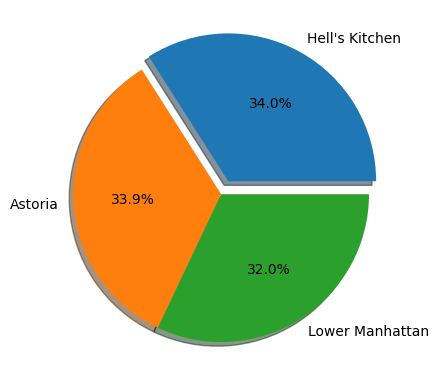

In [17]:
# Melihat jumlah sales pada setiap toko

pie_plot(column_name = "store_location", explodeIndex = 0)

### Insight Pertama : Tingkat penjualan dari ketiga toko tersebut serupa, dengan perbedaan yang paling signifikan terlihat di toko Hell's Kitchen 

C:\Users\M TEGAR RADIANSYAH\AppData\Local\Temp\ipykernel_9336\3929679107.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.countplot(x = x_axis, y = y_axis, data = data, hue = hue, order = order, palette = "RdBu")


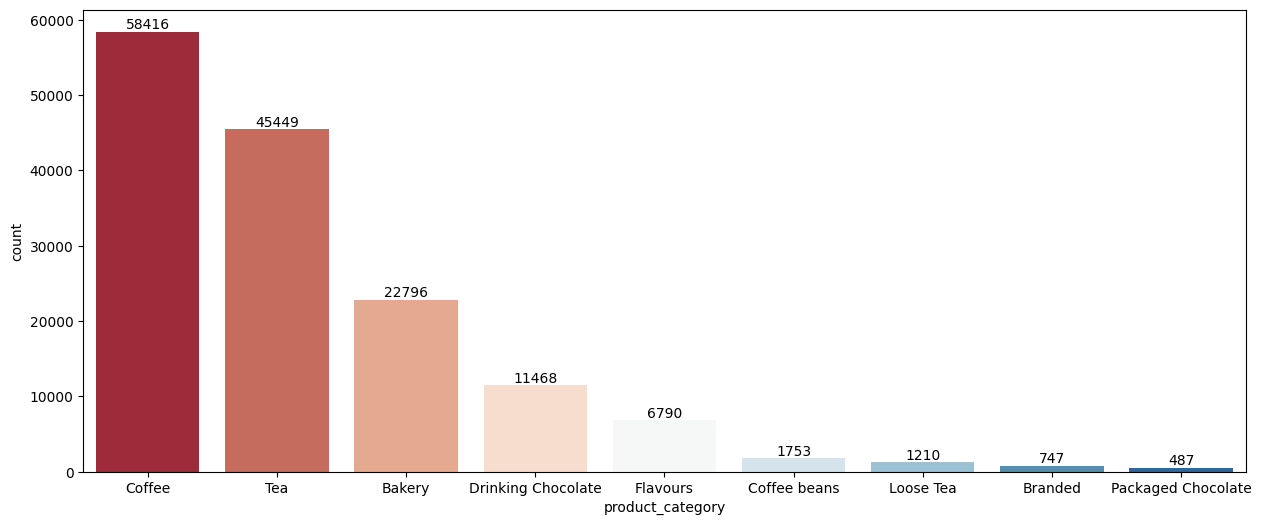

In [13]:
#menampilkan product_category apa yang paling laku

# set figure size
plt.figure(figsize = (15,6))

# call function i create it in cell 12
count_plot(x_axis = "product_category") 

## Insight Kedua
## Kita bisa melihat Insight dari plot diatas
* Terbukti bahwa ketiga toko tersebut menawarkan berbagai macam layanan. 
* Kopi merupakan produk terlaris.
* Teh juga menunjukkan tingkat penjualan yang tinggi.

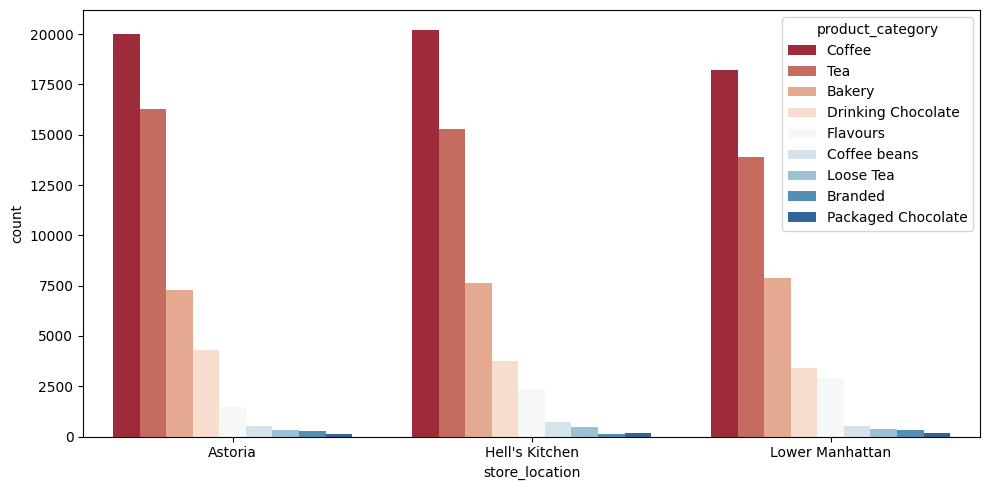

In [14]:
#Kita bisa meliat dari sisi 3 Store dengan beberapa product categories

#Menghitung jumlah produk kategori pada setiap store
popular_products = data.groupby('store_location')[['product_category']].value_counts().reset_index(name='count')

#membuat besar plotnya
plt.figure(figsize=(10, 5))

#Membuat bar plot
sns.barplot(x = 'store_location', y = 'count', hue = 'product_category', data = popular_products, palette = "RdBu")

plt.tight_layout()
plt.show()

## Insight Ketiga
### Toko Astoria
* Kategori produk terlaris adalah Kopi dengan jumlah 20.025 unit
* Setelah Kopi, Teh menempati posisi kedua sebagai kategori terpopuler dengan jumlah 16.260 unit
* Kategori lain seperti Roti, Cokelat Minum, Perisa, Biji Kopi, Teh Celup, Teh Celup, dan Cokelat Kemasan memiliki jumlah yang bervariasi, mulai dari 7289 hingga 110 unit, dengan urutan menurun

### Hell's Kitchen Store
* Serupa dengan Astoria, Coffee memimpin dalam hal penjualan, sebesar 20.187 unit
* Teh menyusul di urutan kedua sebagai kategori terpopuler dengan 15.277 unit
* Kategori lain, seperti Roti, Cokelat Minum, Perisa, Biji Kopi, Teh Gendut, Cokelat Kemasan, Bermerek, dan Cokelat Kemasan, memiliki jumlah mulai dari 7617 hingga 119 unit

### Lower Manhattan Store 
* Kopi kembali menjadi kategori terlaris dengan 18.204 unit
* Teh menyusul dengan 13.912 unit
* Roti, Cokelat Minum, Perisa, Biji Kopi, Teh Gendut, Teh Bermerek, Cokelat Kemasan memiliki jumlah mulai dari 7890 hingga 180 unit, dalam urutan menurun

